### importation des librairies

In [1]:
from scipy import *
from matplotlib.pyplot import *

### Calcul de la distance
Le calcul de la fonction cout, qui est dans ce cas égale à la distance totale de trajet. Alors on construit la matrice m qui contient les coordonnees des villes, ensuite on calcul la somme des distances, qui separent deux villes consecutives dans ce trajet.


In [2]:
def distancedutrajet(trajet):
    energie = 0.0
    m = c_[x[trajet],y[trajet]]
    energie = sum(sqrt(sum((m - roll(m,-1,axis=0))**2,axis=1)))
    return energie

###  Création de la fluctuation

In [3]:
def Fluctuation(i,j):
    Min = min(i,j)
    Max = max(i,j)
    trajet[Min:Max] = trajet[Min:Max].copy()[::-1]
    return 

### Algorithme de Metropolis 
a pour but de comparer les distances des deux trajets. Ensuite, si le deuxiéme a une distance plus faible que celui du premier, alors il sera choisie. Sinon je ne me bloque pas pour ne pas rester dans un minimum local éventuel, et je décide que le deuxiéme trajet devient mon nouvel état avec une probabilité qui depend de la température et de la difference entre les longueurs des deux trajets.

In [4]:
def Metropolis(E1,E2):
    global T
    global Em
    global trajetm
    if E2 <= E1:
        E1 = E2      # énergie du nouvel état = énergie système
        if E2<=Em :
            Em=E2
            trajetm=trajet
    else:
        dE = E2-E1
        if random.uniform() > exp(-dE/T): # la fluctuation est retenue avec  
            Fluctuation(i,j)              # la proba p. sinon retour trajet antérieur
        else:
            E1 = E2 # la fluctuation est retenue 
    return E1

### Initialisation des paramétres

In [5]:
N=20                          # nombre des villes
x = random.uniform(size=N)
y = random.uniform(size=N)
L=70000

In [6]:
distance = []            # initialisation de la liste distance, pour conserver toutes les valeurs obtenues 
temps = []               # initialisation de la liste distance, pour conserver toutes les valeurs obtenues 
Temperature = [] 
T0 = 10.0                # la température initiale
Tmin = 0.01            # la température minimale
tau = 100            # paramétre qui influe sur la vitesse de refroidissement  10000

### la  liste des abscisses x des villes

In [7]:
x

array([0.85697904, 0.91678162, 0.16228812, 0.78905394, 0.41849041,
       0.58078617, 0.60923136, 0.02735111, 0.4934204 , 0.78053829,
       0.36178622, 0.13523817, 0.36619954, 0.44055504, 0.97336723,
       0.1503504 , 0.8121782 , 0.56825875, 0.31265072, 0.68734235])

### la  liste des ordonnées y des villes

In [8]:
y

array([0.84878444, 0.75422527, 0.53604672, 0.55293289, 0.04910512,
       0.10332666, 0.1672914 , 0.74732697, 0.77710419, 0.59232918,
       0.6580805 , 0.04898286, 0.40206502, 0.08146977, 0.51372878,
       0.48013912, 0.31775028, 0.6031471 , 0.67312947, 0.42272594])

### défintion du trajet initial

In [9]:
trajet = arange(N)
trajet0 = trajet.copy()
trajet0
trajetm=trajet0

### Calcul da la longueur du trajet initial

In [10]:
Ec = distancedutrajet(trajet0)
Em=Ec
Ec

9.58660531688198

In [11]:
t = 0
k=0
T = T0   # intialiser la temperature à la température initiale

    
while T > Tmin and k<L:
        
        k=k+1
        i = random.random_integers(0,N-1)    # choix de deux villes différentes au hasard
        j = random.random_integers(0,N-1)
        if i == j: continue                   # si i==j on rechoisit d'autre entries 
  
        Fluctuation(i,j)                    #  création de la fluctuation afin d'obtenir une autre proposition des trajets
        Ef = distancedutrajet(trajet)             # calcul de la distance du nouveau trajet
        Ec = Metropolis(Ec,Ef)              # application de l'algorithme de Metropolis
       
        t += 1                              # incrementation du temps
        T = T0*exp(-t/tau)                # diminution de la temperature
                    
        distance.append(Ec)
        temps.append(t)
        Temperature.append(T)
   

C:\Users\hp\Anaconda3\anacondaa\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(0, 19 + 1) instead
  if __name__ == '__main__':
C:\Users\hp\Anaconda3\anacondaa\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 19 + 1) instead
  # Remove the CWD from sys.path while we load stuff.


In [12]:
Em

4.46932917174877

Text(0, 0.5, 'les ordonnées y des villes')

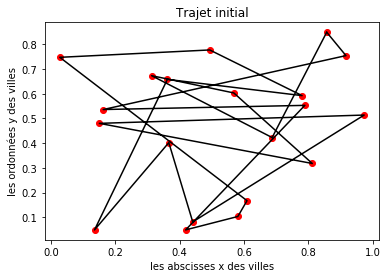

In [13]:
plot(x,y,'ro')
plot(x[trajet0],y[trajet0],'k')
plot([x[trajet0[-1]], x[trajet0[0]]],[y[trajet0[-1]], y[trajet0[0]]],'k')
title('Trajet initial')
xlabel('les abscisses x des villes')
ylabel('les ordonnées y des villes')

Text(0, 0.5, 'les ordonnées y des villes')

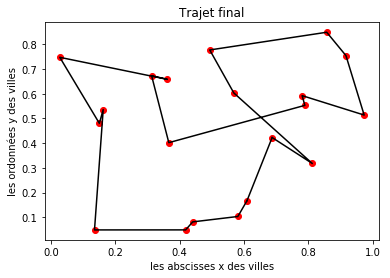

In [14]:
plot(x,y,'ro')
plot(x[trajetm],y[trajetm],'k')
plot([x[trajetm[-1]], x[trajetm[0]]],[y[trajetm[-1]], y[trajetm[0]]],'k')
title('Trajet final')
xlabel('les abscisses x des villes')
ylabel('les ordonnées y des villes')

Text(0, 0.5, 'Energie')

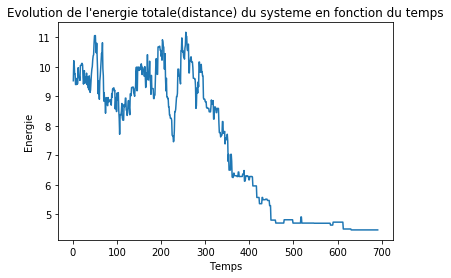

In [15]:
plot(temps, distance)
title("Evolution de l'energie totale(distance) du systeme en fonction du temps")
xlabel('Temps')
ylabel('Energie')

Text(0, 0.5, 'Temperature')

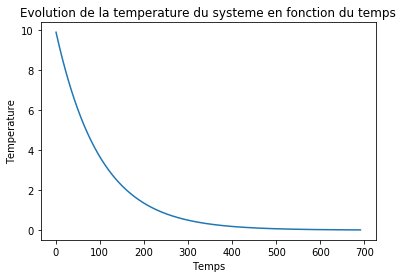

In [16]:
plot(temps, Temperature)
title('Evolution de la temperature du systeme en fonction du temps')
xlabel('Temps')
ylabel('Temperature')
    